<a href="https://colab.research.google.com/github/adinathu/Support-Vector-Machine-and-CNN-Approach-for-CT-Scan-Image-Classification-of-COVID-19/blob/main/Copy_of_COVID_CTSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 91% 209M/230M [00:01<00:00, 141MB/s]
100% 230M/230M [00:01<00:00, 177MB/s]


In [ ]:
! unzip sarscov2-ctscan-dataset.zip

Archive:  sarscov2-ctscan-dataset.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (102).png   
  inflating:

In [ ]:
! unzip CT_NonCOVID.zip

unzip:  cannot find or open CT_NonCOVID.zip, CT_NonCOVID.zip.zip or CT_NonCOVID.zip.ZIP.


In [ ]:
! unzip CT_COVID.zip


unzip:  cannot find or open CT_COVID.zip, CT_COVID.zip.zip or CT_COVID.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os


In [ ]:
pip install split-folders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders


In [ ]:
splitfolders.ratio("ct", # The location of dataset
                   output="train_data", # The output location
                   seed=42, # The number of seed
                   ratio=(.8, .2, .0), # The ratio of splited dataset
                   group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
                   move=False # If you choose to move, turn this into True
                   )


Copying files: 0 files [00:00, ? files/s]
Copying files: 404 files [00:00, 4035.94 files/s]
Copying files: 895 files [00:00, 4548.30 files/s]
Copying files: 1350 files [00:00, 3954.21 files/s]
Copying files: 1754 files [00:00, 3903.63 files/s]
Copying files: 2481 files [00:00, 3803.39 files/s]


In [ ]:
print('Covid Images' , len(os.listdir('/content/ct/COVID')))
print('Non Covid Images' , len(os.listdir('/content/ct/non-COVID')))


Covid Images 1252
Non Covid Images 1229


In [ ]:
tst=len((os.listdir('/content/train_data/test/COVID'))+(os.listdir('/content/train_data/test/non-COVID')))

tr=len((os.listdir('/content/train_data/train/COVID'))+(os.listdir('/content/train_data/train/non-COVID')))

val=len((os.listdir('/content/train_data/val/COVID'))+(os.listdir('/content/train_data/val/non-COVID')))

print('Train Images' , tr)
print('Test Images' , tst)
print('Val Images' , val)


Train Images 1984
Test Images 2
Val Images 495


**After Data is Ready......Start  working Model**


Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),
    Conv2D(64, 3, padding='same', activation='relu'),































In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
batch_size = 128
epochs = 20
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [ ]:
train_dir='/content/train_data/train/'

In [ ]:
val_dir='/content/train_data/val/'

In [ ]:
train_dir

'/content/train_data/train/'

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 596 images belonging to 3 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=val_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 148 images belonging to 3 classes.


In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

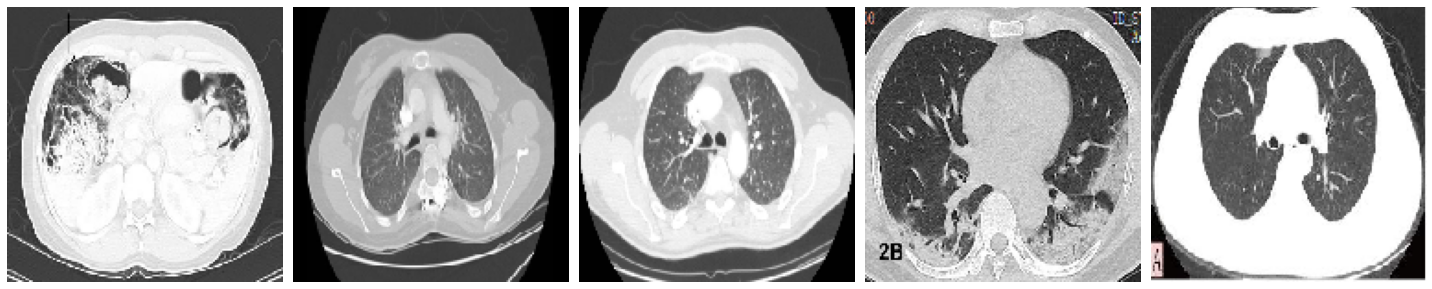

In [ ]:
plotImages(sample_training_images[:6])

In [ ]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=tr // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val // batch_size
)

<ipython-input-45-d75395a67997>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
4/4 [==============================] - 12s 881ms/step - loss: -1.0370 - accuracy: 0.3419 - val_loss: -6.9006 - val_accuracy: 0.4688
Epoch 2/20
4/4 [==============================] - 3s 724ms/step - loss: -7.3020 - accuracy: 0.4637 - val_loss: -7.5448 - val_accuracy: 0.4766
Epoch 3/20
4/4 [==============================] - 3s 761ms/step - loss: -8.1718 - accuracy: 0.4473 - val_loss: -7.9332 - val_accuracy: 0.4844
Epoch 4/20
4/4 [==============================] - 3s 780ms/step - loss: -8.4202 - accuracy: 0.4637 - val_loss: -8.5662 - val_accuracy: 0.4766
Epoch 5/20
4/4 [==============================] - 3s 745ms/step - loss: -8.7479 - accuracy: 0.4786 - val_loss: -8.6646 - val_accuracy: 0.5000
Epoch 6/20
4/4 [==============================] - 3s 723ms/step - loss: -9.4082 - accuracy: 0.4688 - val_loss: -10.1494 - val_accuracy: 0.4453
Epoch 7/20
4/4 [==============================] - 3s 737ms/step - loss: -9.9929 - accuracy: 0.4648 - val_loss: -9.9372 - val_accuracy: 0.4844
Epoc

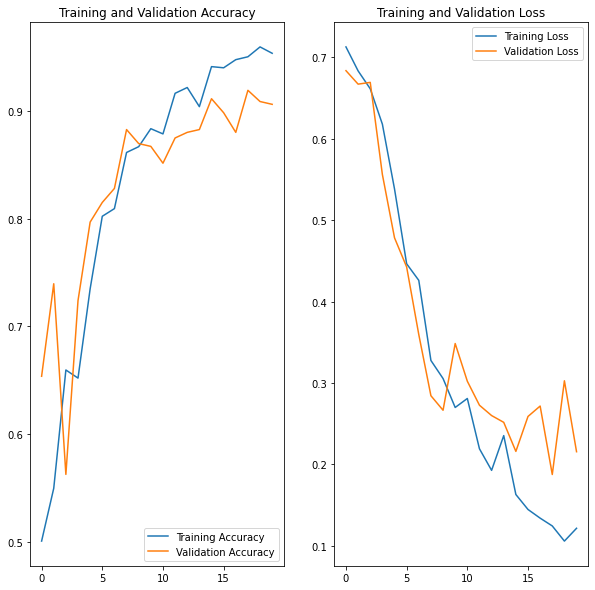

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 1984 images belonging to 2 classes.


In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

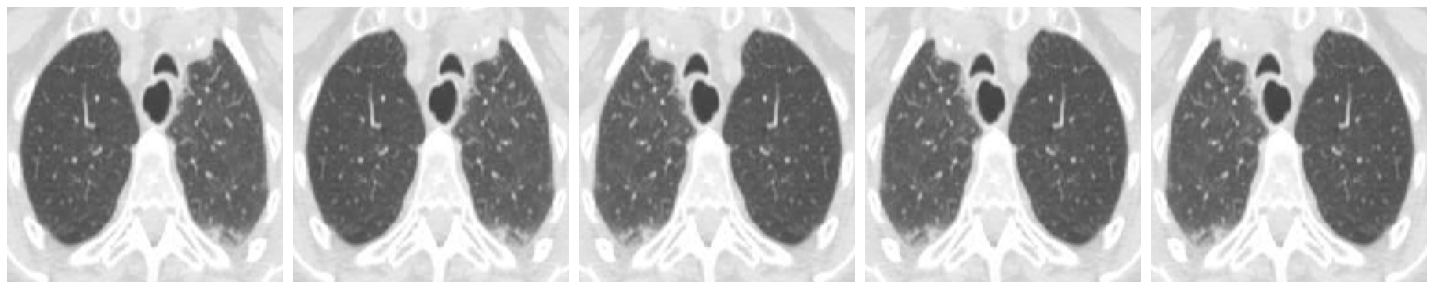

In [ ]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

# Randomly rotate the image

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1984 images belonging to 2 classes.


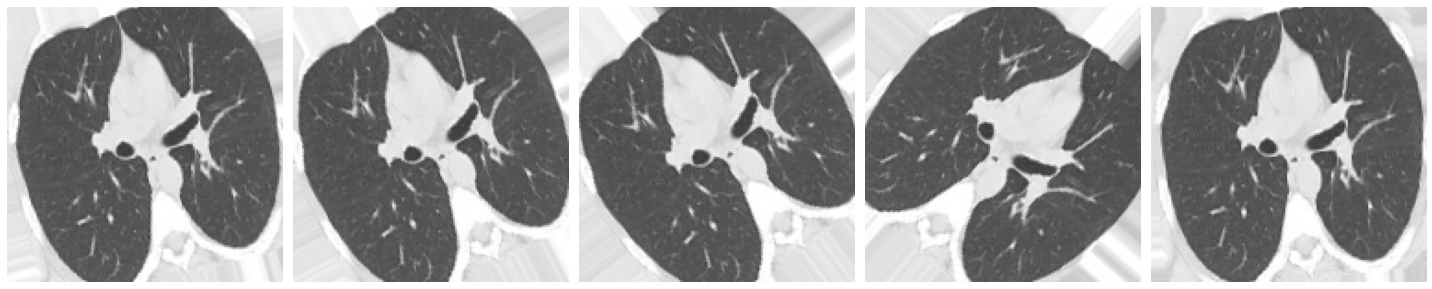

In [ ]:
plotImages(augmented_images)

**Apply zoom augmentation**

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

In [ ]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 1984 images belonging to 2 classes.


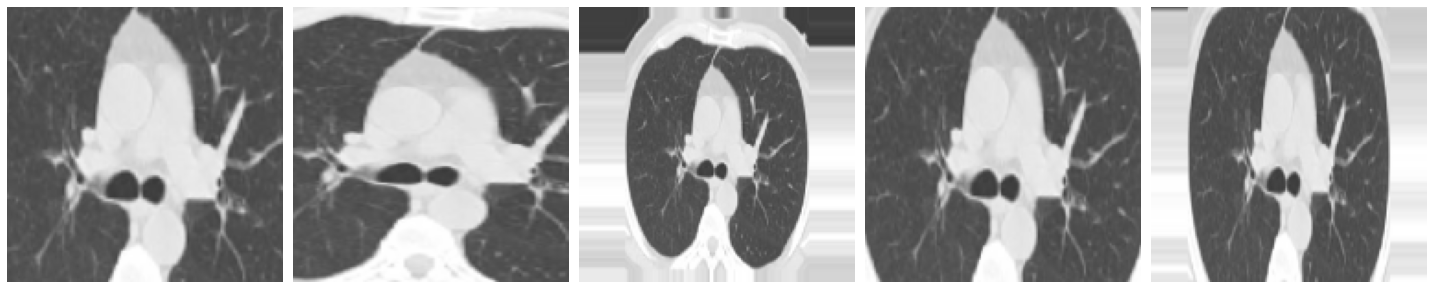

In [ ]:
plotImages(augmented_images)

 **Put it all together**

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    horizontal_flip=True,
                    zoom_range=0.20
                    )

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 1984 images belonging to 2 classes.


Visualize how a single image would look five different times when passing these augmentations randomly to the dataset.

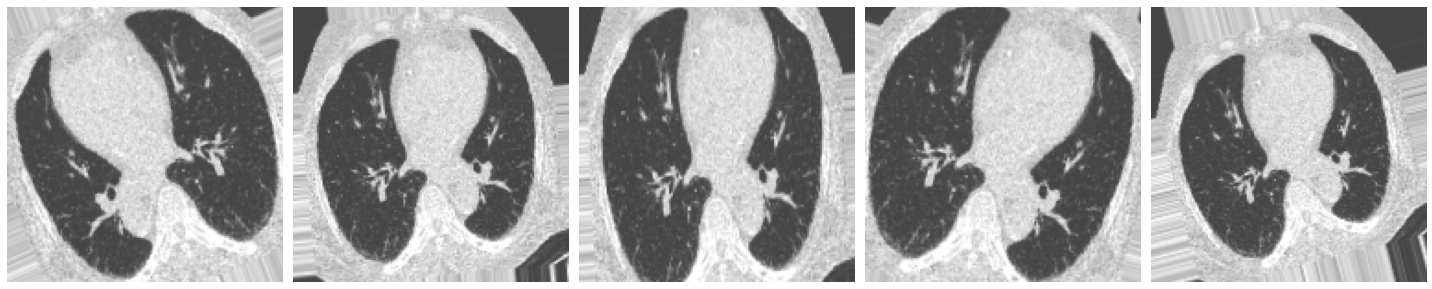

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [ ]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 495 images belonging to 2 classes.


Dropout

## Creating a new network with Dropouts

In [ ]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.3),
    Flatten(),
    Dense(512, activation='sigmoid'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_new.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_new.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 37, 37, 64)       

In [ ]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=tr // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val // batch_size
)

<ipython-input-80-d75395a67997>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
15/15 [==============================] - 19s 1s/step - loss: 0.3784 - accuracy: 0.8341 - val_loss: 0.3127 - val_accuracy: 0.8568
Epoch 2/20
15/15 [==============================] - 19s 1s/step - loss: 0.3537 - accuracy: 0.8491 - val_loss: 0.3198 - val_accuracy: 0.8568
Epoch 3/20
15/15 [==============================] - 19s 1s/step - loss: 0.3464 - accuracy: 0.8502 - val_loss: 0.3496 - val_accuracy: 0.8359
Epoch 4/20
15/15 [==============================] - 19s 1s/step - loss: 0.3289 - accuracy: 0.8621 - val_loss: 0.3057 - val_accuracy: 0.8672
Epoch 5/20
15/15 [==============================] - 19s 1s/step - loss: 0.3250 - accuracy: 0.8637 - val_loss: 0.3941 - val_accuracy: 0.8281
Epoch 6/20
15/15 [==============================] - 19s 1s/step - loss: 0.3213 - accuracy: 0.8631 - val_loss: 0.3134 - val_accuracy: 0.8672
Epoch 7/20
15/15 [==============================] - 20s 1s/step - loss: 0.3212 - accuracy: 0.8680 - val_loss: 0.2869 - val_accuracy: 0.8750
Epoch 8/20
15/15 [==

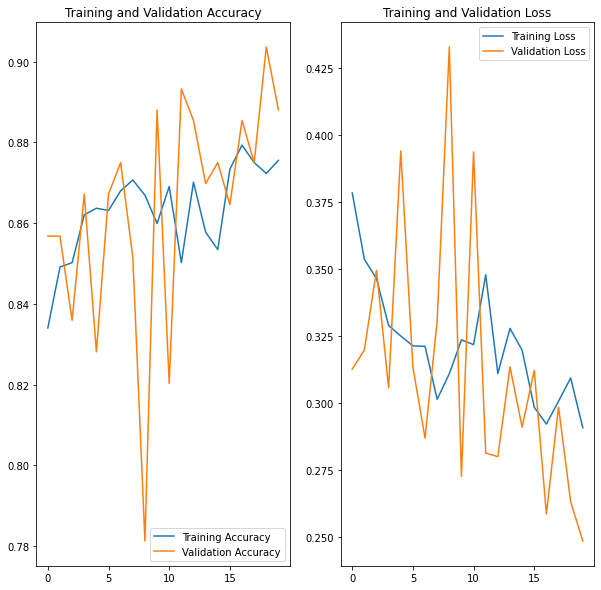

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Visualize the model

In [ ]:
model_new.layers

In [ ]:
layer_outputs = [layer.output for layer in model_new.layers[:20]]
layer_outputs

[<KerasTensor: shape=(None, 150, 150, 16) dtype=float32 (created by layer 'conv2d_8')>,
 <KerasTensor: shape=(None, 75, 75, 16) dtype=float32 (created by layer 'max_pooling2d_8')>,
 <KerasTensor: shape=(None, 75, 75, 16) dtype=float32 (created by layer 'dropout_4')>,
 <KerasTensor: shape=(None, 75, 75, 32) dtype=float32 (created by layer 'conv2d_9')>,
 <KerasTensor: shape=(None, 37, 37, 32) dtype=float32 (created by layer 'max_pooling2d_9')>,
 <KerasTensor: shape=(None, 37, 37, 64) dtype=float32 (created by layer 'conv2d_10')>,
 <KerasTensor: shape=(None, 18, 18, 64) dtype=float32 (created by layer 'max_pooling2d_10')>,
 <KerasTensor: shape=(None, 18, 18, 64) dtype=float32 (created by layer 'dropout_5')>,
 <KerasTensor: shape=(None, 18, 18, 64) dtype=float32 (created by layer 'conv2d_11')>,
 <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'max_pooling2d_11')>,
 <KerasTensor: shape=(None, 9, 9, 64) dtype=float32 (created by layer 'dropout_6')>,
 <KerasTensor: shape=

In [ ]:
layer_names = [layer.name for layer in model_new.layers[:20]]
layer_names

['conv2d_8',
 'max_pooling2d_8',
 'dropout_4',
 'conv2d_9',
 'max_pooling2d_9',
 'conv2d_10',
 'max_pooling2d_10',
 'dropout_5',
 'conv2d_11',
 'max_pooling2d_11',
 'dropout_6',
 'flatten_2',
 'dense_4',
 'dropout_7',
 'dense_5']

In [ ]:
activation_model = model.Model(inputs = model.input, outputs = layer_outputs)


AttributeError: ignored

In [ ]:
activations = activation_model.predict(img_tensor)

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly-gpu-2.0-preview
except Exception:
  pass
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-gpu-2.0-preview


In [ ]:
activation_model =tf.keras.models.Model(inputs=model_new.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(train_data_gen[0][0])

4/4 [==============================] - 0s 10ms/step


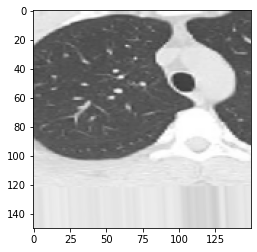

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(train_data_gen[0][0][0])
plt.show()

In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(128, 150, 150, 16)


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(128, 150, 150, 16)
